In [22]:
import os, sys, random, shutil
from glob import glob
import pandas as pd
from shutil import copyfile
import pandas as pd
from sklearn import preprocessing, model_selection
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import patches
import numpy as np
#import cv2
from tqdm import tqdm
import random


In [23]:
df = pd.read_csv('gland_proposal.csv')

new_df = []

#idx=0
for i in range(len(df)):
    row = df.iloc[i].tolist()
    #filename = idx
    filename = row[0][:-4]
    type_ = 'Prostate'
    xmin = row[4]
    ymin = row[5]
    xmax = row[6]
    ymax = row[7]
    
    new_row = [row[0], filename, type_, xmin, xmax, ymin, ymax]
    new_df.append(new_row)
    #idx+=1
    
data = pd.DataFrame(new_df, columns=['prev_filename', 'filename', 'type', 'xmin', 'xmax', 'ymin', 'ymax'])
data[['prev_filename','filename', 'type', 'xmin', 'xmax', 'ymin', 'ymax']].to_csv('ProstateX.csv', index=False)
data.head(10)

,prev_filename,filename,type,xmin,xmax,ymin,ymax
0,1.png,1,Prostate,122,139,118,138
1,2.png,2,Prostate,120,139,119,135
2,3.png,3,Prostate,120,139,118,137
3,4.png,4,Prostate,114,145,113,139
4,5.png,5,Prostate,102,151,109,148
5,6.png,6,Prostate,98,155,107,146
6,7.png,7,Prostate,94,159,105,153
7,8.png,8,Prostate,90,163,104,159
8,9.png,9,Prostate,88,168,104,159
9,10.png,10,Prostate,86,167,98,160


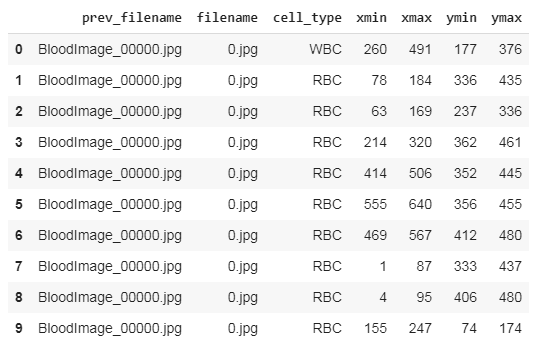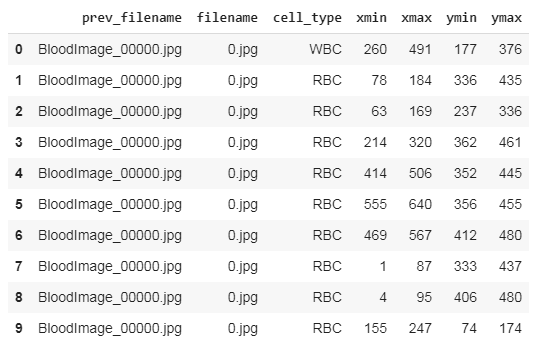

In [24]:
img_width = 256
img_height = 256

def width(df):
    return int(df.xmax - df.xmin)
def height(df):
    return int(df.ymax - df.ymin)
def x_center(df):
    return int(df.xmin + (df.width/2))
def y_center(df):
    return int(df.ymin + (df.height/2))
def w_norm(df):
    return df/img_width
def h_norm(df):
    return df/img_height

df = pd.read_csv('ProstateX.csv')

le = preprocessing.LabelEncoder()
le.fit(df['type'])
print(le.classes_)
labels = le.transform(df['type'])
df['labels'] = labels

df['width'] = df.apply(width, axis=1)
df['height'] = df.apply(height, axis=1)

df['x_center'] = df.apply(x_center, axis=1)
df['y_center'] = df.apply(y_center, axis=1)

df['x_center_norm'] = df['x_center'].apply(w_norm)
df['width_norm'] = df['width'].apply(w_norm)

df['y_center_norm'] = df['y_center'].apply(h_norm)
df['height_norm'] = df['height'].apply(h_norm)

df.head(30)

['Prostate']


,prev_filename,filename,type,xmin,xmax,ymin,ymax,labels,width,height,x_center,y_center,x_center_norm,width_norm,y_center_norm,height_norm
0,1.png,1,Prostate,122,139,118,138,0,17,20,130,128,0.507812,0.066406,0.500000,0.078125
1,2.png,2,Prostate,120,139,119,135,0,19,16,129,127,0.503906,0.074219,0.496094,0.062500
2,3.png,3,Prostate,120,139,118,137,0,19,19,129,127,0.503906,0.074219,0.496094,0.074219
3,4.png,4,Prostate,114,145,113,139,0,31,26,129,126,0.503906,0.121094,0.492188,0.101562
4,5.png,5,Prostate,102,151,109,148,0,49,39,126,128,0.492188,0.191406,0.500000,0.152344
5,6.png,6,Prostate,98,155,107,146,0,57,39,126,126,0.492188,0.222656,0.492188,0.152344
6,7.png,7,Prostate,94,159,105,153,0,65,48,126,129,0.492188,0.253906,0.503906,0.187500
7,8.png,8,Prostate,90,163,104,159,0,73,55,126,131,0.492188,0.285156,0.511719,0.214844
8,9.png,9,Prostate,88,168,104,159,0,80,55,128,131,0.500000,0.312500,0.511719,0.214844
9,10.png,10,Prostate,86,167,98,160,0,81,62,126,129,0.492188,0.316406,0.503906,0.242188


In [25]:
for i in tqdm(range(2)):

    #df
    
    df_ = pd.read_csv('slices_per_volume.csv')
    
    total = 2801
    train=int(total*0.8)
    val=total-train

    ids = list(set(df_['ids'].values))

    slices = np.array([])
    bgs = np.array([])
    while len(slices) < train:
        #pick and remove from list
        pick=random.choice(ids)
        ids.remove(pick)
    
        imgs = df_.loc[df_['ids'] == pick].loc[df_['images'].str.contains('B')==False]['images'].values
        bg = df_.loc[df_['ids'] == pick].loc[df_['images'].str.contains('B')==True]['images'].values

        slices = np.append(slices, imgs)
        bgs = np.append(bgs, bg)
        
    
    df_train = df.loc[df['prev_filename'].isin(slices)]
    df_valid = df.loc[~df['prev_filename'].isin(slices)]
    
    bg_train = df_.loc[df_['images'].isin(bgs)]['images'].values
    bg_valid = df_.loc[df_['images'].str.contains('B')==True & ~df_['images'].isin(bgs)]['images'].values
    
    #df_train, df_valid = model_selection.train_test_split(df, test_size=0.2, random_state=i, shuffle=True)
    #print(df_train.shape, df_valid.shape)

    os.mkdir('content_'+str(i))
    os.mkdir('content_'+str(i)+'/ProstateX/')
    os.mkdir('content_'+str(i)+'/ProstateX/images/')
    os.mkdir('content_'+str(i)+'/ProstateX/images/train/')
    os.mkdir('content_'+str(i)+'/ProstateX/images/valid/')

    os.mkdir('content_'+str(i)+'/ProstateX/labels/')
    os.mkdir('content_'+str(i)+'/ProstateX/labels/train/')
    os.mkdir('content_'+str(i)+'/ProstateX/labels/valid/')

    def segregate_data(df, img_path, label_path, train_img_path, train_label_path):
        filenames = []
        for filename in df.filename:
            filenames.append(filename)
        filenames = set(filenames)

        for filename in filenames:
            yolo_list = []

            for _,row in df[df.filename == filename].iterrows():
                yolo_list.append([row.labels, row.x_center_norm, row.y_center_norm, row.width_norm, row.height_norm])

            yolo_list = np.array(yolo_list)
            txt_filename = os.path.join(train_label_path,str(row.prev_filename.split('.')[0])+".txt")
            np.savetxt(txt_filename, yolo_list, fmt=["%d", "%f", "%f", "%f", "%f"])
            shutil.copyfile(os.path.join(img_path,row.prev_filename), os.path.join(train_img_path,row.prev_filename))

    src_img_path = "ProstateX/Images/"
    src_label_path = "ProstateX/Annotations/"

    train_img_path = 'content_'+str(i)+"/ProstateX/images/train"
    train_label_path = 'content_'+str(i)+"/ProstateX/labels/train"

    valid_img_path = 'content_'+str(i)+"/ProstateX/images/valid"
    valid_label_path = 'content_'+str(i)+"/ProstateX/labels/valid"

    segregate_data(df_train, src_img_path, src_label_path, train_img_path, train_label_path)
    segregate_data(df_valid, src_img_path, src_label_path, valid_img_path, valid_label_path)

    #print("No. of Training images", len(os.listdir('content/ProstateX/images/train')))
    #print("No. of Training labels", len(os.listdir('content/ProstateX/labels/train')))

    #print("No. of valid images", len(os.listdir('content/ProstateX/images/valid')))
    #print("No. of valid labels", len(os.listdir('content/ProstateX/labels/valid')))
    
    # Coment if not using background
    
    #datadir = 'Background'
    #for img in bg_train:
    #    shutil.copyfile(os.path.join(datadir, img), os.path.join('content_'+str(i)+"/ProstateX/images/train", img))
    #for img in bg_valid:
    #    shutil.copyfile(os.path.join(datadir, img), os.path.join('content_'+str(i)+"/ProstateX/images/valid", img))

100%|██████████| 2/2 [00:07<00:00,  3.71s/it]


In [11]:
datadir = 'Background'
images = sorted(glob(os.path.join(datadir, "*.png")))
#training size
t_size = int(len(images)*0.8)
for i in tqdm(range(30)):
    train = random.sample(images, t_size)
    test = (list(list(set(images)-set(train)) + list(set(train)-set(images))))
    
    for elem in train:
        shutil.copyfile(elem, os.path.join('content_'+str(i)+"/ProstateX/images/train", elem[11:]))
    for elem in test:
        shutil.copyfile(elem, os.path.join('content_'+str(i)+"/ProstateX/images/valid", elem[11:]))

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [01:50<00:00,  3.67s/it]


In [9]:
df_ = pd.read_csv('slices_per_volume.csv')

In [13]:
list(set(df_['ids'].values))
len(df_['ids'].values)

3718

In [14]:
3718*0.8

2974.4

In [11]:
total = 3178
train=int(total*0.8)
val=total-train

ids = list(set(df_['ids'].values))

slices = np.array([])
bgs = np.array([])
while len(slices) < train:
    #pick and remove from list
    pick=random.choice(ids)
    ids.remove(pick)
    
    imgs = df_.loc[df_['ids'] == pick].loc[df_['images'].str.contains('B')==False]['images'].values
    bg = df_.loc[df_['ids'] == pick].loc[df_['images'].str.contains('B')==True]['images'].values
    
    slices = np.append(slices, imgs)
    bgs = np.append(bgs, imgs)
    

In [20]:
slices

array(['2535.png', '2536.png', '2537.png', ..., '1484.png', '1485.png',
       '1486.png'], dtype=object)

In [13]:
df_train.loc[df_train['prev_filename'].isin(slices)]
df_train.loc[~df_train['prev_filename'].isin(slices)]

,prev_filename,filename,type,xmin,xmax,ymin,ymax,labels,width,height,x_center,y_center,x_center_norm,width_norm,y_center_norm,height_norm
452,587.png,587,Prostate,120,207,131,199,0,87,68,163,165,0.509375,0.271875,0.515625,0.212500
1756,2284.png,2284,Prostate,141,199,127,179,0,58,52,170,153,0.531250,0.181250,0.478125,0.162500
1516,1957.png,1957,Prostate,138,177,115,149,0,39,34,157,132,0.490625,0.121875,0.412500,0.106250
1832,2390.png,2390,Prostate,123,197,146,199,0,74,53,160,172,0.500000,0.231250,0.537500,0.165625
1334,1717.png,1717,Prostate,121,193,132,199,0,72,67,157,165,0.490625,0.225000,0.515625,0.209375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1778,2316.png,2316,Prostate,116,204,136,196,0,88,60,160,166,0.500000,0.275000,0.518750,0.187500
1033,1322.png,1322,Prostate,143,180,142,175,0,37,33,161,158,0.503125,0.115625,0.493750,0.103125
1731,2255.png,2255,Prostate,107,200,125,218,0,93,93,153,171,0.478125,0.290625,0.534375,0.290625
763,972.png,972,Prostate,100,199,102,199,0,99,97,149,150,0.465625,0.309375,0.468750,0.303125


In [ ]:
bgs

In [14]:
bg_valid

array(['0.png', '1.png', '2.png', ..., '2798.png', '2799.png', '2800.png'],
      dtype=object)

In [ ]:
df_.loc[df_['images'].isin(bgs)]['images'].values

In [18]:
df_.loc[df_['images'].str.contains('B')==True & ~df_['images'].isin(bgs)]['images'].values

array(['B_48.png', 'B_129.png', 'B_130.png', 'B_131.png', 'B_132.png',
       'B_133.png', 'B_175.png', 'B_176.png', 'B_220.png', 'B_221.png',
       'B_222.png', 'B_223.png', 'B_230.png', 'B_340.png', 'B_341.png',
       'B_342.png', 'B_343.png', 'B_344.png', 'B_362.png', 'B_363.png',
       'B_364.png', 'B_365.png', 'B_366.png', 'B_518.png', 'B_519.png',
       'B_520.png', 'B_521.png', 'B_522.png', 'B_600.png', 'B_601.png',
       'B_602.png', 'B_603.png', 'B_604.png', 'B_605.png', 'B_613.png',
       'B_614.png', 'B_615.png', 'B_616.png', 'B_621.png', 'B_639.png',
       'B_640.png', 'B_641.png', 'B_843.png', 'B_844.png', 'B_845.png',
       'B_846.png', 'B_847.png', 'B_848.png', 'B_849.png', 'B_850.png',
       'B_851.png'], dtype=object)